In [2]:
from cProfile import label

from numpy.array_api import astype

df_link = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(df_link)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df[['insulin', 'triceps', 'bmi']] = df[['insulin', 'triceps', 'bmi']].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [7]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

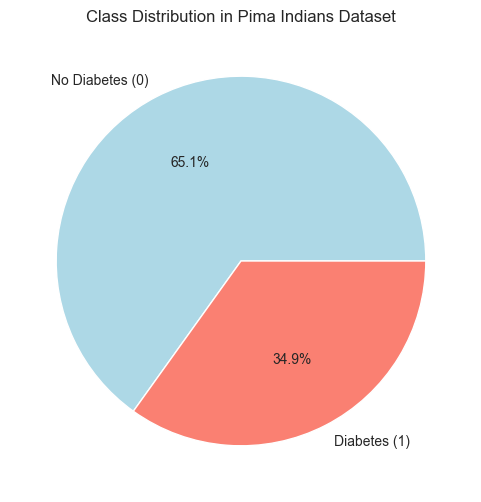

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(y.value_counts(), labels=['No Diabetes (0)', 'Diabetes (1)'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Class Distribution in Pima Indians Dataset")

plt.show()

In [9]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

In [10]:
# Standard Scaler - ALWAYS USE A SCALER
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Train the model
logistic_regression = LogisticRegression()

In [12]:
logistic_regression.fit(X_train, y_train)

# Get predicted raw probabilities for class 1 (they have diabetes)
y_pred_pr = logistic_regression.predict_proba(X_test)[:, 1]

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pr)
roc_auc = auc(fpr, tpr)

# find the best threshold (closest to the upper left corner of the roc graph
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold:.3f}')
print(f'At this Threshold, TPR: {tpr[optimal_idx]:.3f}, FPR: {fpr[optimal_idx]:.3f}')

Optimal Threshold: 0.218
At this Threshold, TPR: 0.889, FPR: 0.347


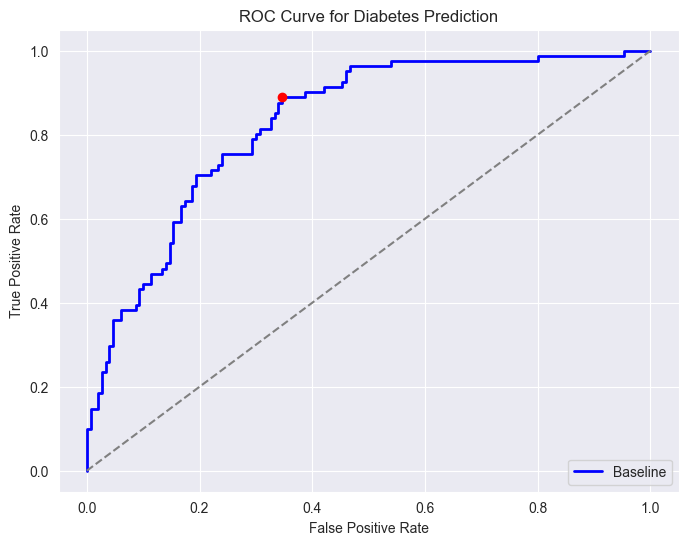

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC CURVE (AUC = {roc_auc:.3f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold ({optimal_threshold:.3f}])', zorder=3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend(["Baseline"], loc='lower right')  # Added a label for the legend
plt.show()

In [14]:
# apply a def threshold
y_pred_default = (y_pred_pr >= 0.5).astype(int)

# apply an optimal threshold
y_pred_optimal = (y_pred_pr >= optimal_threshold).astype(int)

# print classification reports
print(f'\n Classification report with default threshold \n{classification_report(y_test, y_pred_default)}')
print(f'\n Classification report with default threshold \n{classification_report(y_test, y_pred_optimal)}')

# print accuracy
print(f'\n Accuracy with default threshold \n{accuracy_score(y_test, y_pred_default):.3f}')
print(f'\n Accuracy with optimal threshold \n{accuracy_score(y_test, y_pred_optimal):.3f}')


 Classification report with default threshold 
              precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231


 Classification report with default threshold 
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       150
           1       0.58      0.89      0.70        81

    accuracy                           0.74       231
   macro avg       0.75      0.77      0.73       231
weighted avg       0.80      0.74      0.74       231


 Accuracy with default threshold 
0.732

 Accuracy with optimal threshold 
0.736


In [15]:
# print confusion matrices
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

print(conf_matrix_default)
print(conf_matrix_optimal)

[[128  22]
 [ 40  41]]
[[98 52]
 [ 9 72]]


Text(627.9949494949494, 0.5, 'True Label')

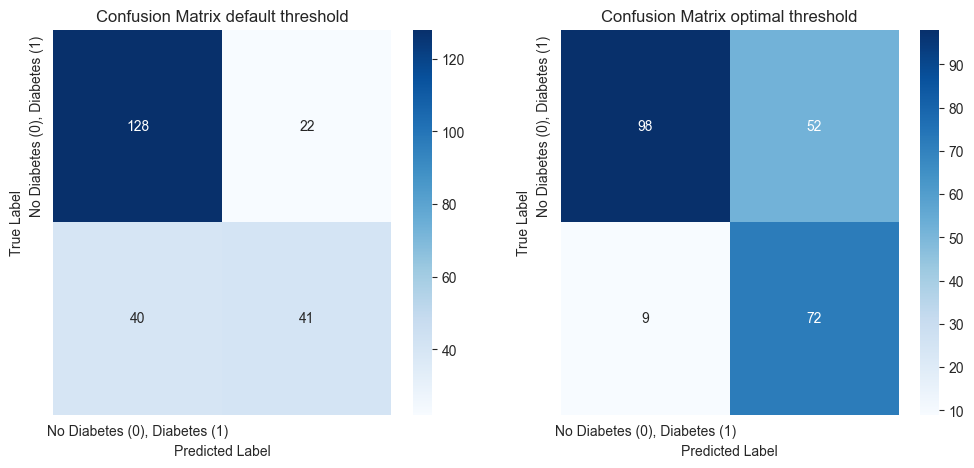

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Diabetes (0), Diabetes (1)"], 
            yticklabels=["No Diabetes (0), Diabetes (1)"], ax=axes[0])

axes[0].set_title("Confusion Matrix default threshold")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes (0), Diabetes (1)"],
            yticklabels=["No Diabetes (0), Diabetes (1)"], ax=axes[1])

axes[1].set_title("Confusion Matrix optimal threshold")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

In [17]:
# Hyper

from sklearn.model_selection import GridSearchCV

logistic_regression2 = LogisticRegression()
param_grid = {'C': np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(logistic_regression2, param_grid, cv=5, scoring='roc_auc', n_jobs=1)
grid_search.fit(X_train, y_train)

best_logistic_regression = grid_search.best_estimator_
best_C = grid_search.best_params_['C']

print(f'Best C Value found: {best_C:.4f}')

Best C Value found: 0.0336


In [18]:
# Do the same procdure for fitting